In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip new-plant-diseases-dataset.zip -d /content/


Archive:  new-plant-diseases-dataset.zip
replace /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import shutil
import os

In [ ]:
drive_folder_path = '/content/drive/My Drive/plant_images/'  # Specify the Google Drive folder

# Make sure the target folder exists
os.makedirs(drive_folder_path, exist_ok=True)
files_in_colab = os.listdir('/content/')

# Step 5: Loop through the files and move them to Google Drive
for filename in files_in_colab:
    source_file = os.path.join('/content/', filename)

    # Move the file to Google Drive (if it's not a directory)
    if os.path.isfile(source_file):
        shutil.move(source_file, os.path.join(drive_folder_path, filename))

print("All files have been moved from /content/ to Google Drive!")

All files have been moved from /content/ to Google Drive!


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
#training image preprocessing
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
   print(x,x.shape)
   print(y,y.shape)

Streaming output truncated to the last 5000 lines.
   [159.   153.   155.  ]
   [163.5  157.5  159.5 ]
   ...
   [120.25 107.25 101.25]
   [136.   123.   117.  ]
   [126.5  113.5  107.5 ]]]


 [[[118.5  108.5  106.5 ]
   [120.   110.   108.  ]
   [128.25 118.25 116.25]
   ...
   [119.5  109.5  107.5 ]
   [116.25 106.25 104.25]
   [110.5  100.5   98.5 ]]

  [[117.   107.   105.  ]
   [122.25 112.25 110.25]
   [122.   112.   110.  ]
   ...
   [115.   105.   103.  ]
   [120.   110.   108.  ]
   [116.   106.   104.  ]]

  [[119.   109.   107.  ]
   [127.   117.   115.  ]
   [119.5  109.5  107.5 ]
   ...
   [114.5  104.5  102.5 ]
   [111.5  101.5   99.5 ]
   [121.5  111.5  109.5 ]]

  ...

  [[167.25 159.25 156.25]
   [167.75 159.75 156.75]
   [167.5  159.5  156.5 ]
   ...
   [164.75 157.75 151.75]
   [163.75 156.75 150.75]
   [163.   156.   150.  ]]

  [[167.5  159.5  156.5 ]
   [165.75 157.75 154.75]
   [165.   157.   154.  ]
   ...
   [165.25 158.25 152.25]
   [164.75 157.75 151.75]
   [

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential



In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25))


In [ ]:
model.add(Flatten())


In [ ]:
model.add(Dense(units=1500,activation='relu'))


In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(units=38,activation='softmax'))


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##training model
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 154s 63ms/step - accuracy: 0.3885 - loss: 2.1867 - val_accuracy: 0.8413 - val_loss: 0.4937
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 187s 62ms/step - accuracy: 0.8375 - loss: 0.5161 - val_accuracy: 0.8850 - val_loss: 0.3556
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9081 - loss: 0.2880 - val_accuracy: 0.9306 - val_loss: 0.2155
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9334 - loss: 0.2049 - val_accuracy: 0.9401 - val_loss: 0.1912
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9520 - loss: 0.1469 - val_accuracy: 0.9437 - val_loss: 0.1857
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9619 - loss: 0.1163 - val_accuracy: 0.9651 - val_loss: 0.1090
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 63ms/step - accuracy: 0.9715 - loss: 0.0886 - val_accuracy: 0.9584 - val_loss: 0.1325
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 

In [ ]:
#model saving and accuracy analysis
#model evaluation
#model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9944 - loss: 0.0168


In [ ]:
print(train_loss,train_acc)

0.014861789532005787 0.9952486157417297


In [ ]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9705 - loss: 0.1017


In [ ]:
print(val_loss,val_acc)

0.10527580231428146 0.9699522256851196


In [ ]:
#saving the model
model.save("/content/drive/My Drive/model_saves/trained_model.h5")

In [ ]:
#model is saved to preserve the architecture of model
# .keras is the second extension
training_history.history

{'accuracy': [0.5974251627922058,
  0.8586101531982422,
  0.915755033493042,
  0.9398961663246155,
  0.9548901319503784,
  0.9653602838516235,
  0.9717618823051453,
  0.9758304357528687,
  0.9787182807922363,
  0.9814353585243225],
 'loss': [1.3741929531097412,
  0.44325846433639526,
  0.2629327178001404,
  0.18604576587677002,
  0.13807542622089386,
  0.10690891742706299,
  0.08733712136745453,
  0.07425085455179214,
  0.0660693570971489,
  0.05782036483287811],
 'val_accuracy': [0.8412815928459167,
  0.8850443959236145,
  0.9306282997131348,
  0.9401320219039917,
  0.9437173008918762,
  0.9650580286979675,
  0.9583997130393982,
  0.9615297317504883,
  0.9570908546447754,
  0.9699522256851196],
 'val_loss': [0.4936574697494507,
  0.3555924594402313,
  0.21549302339553833,
  0.1912178099155426,
  0.185730442404747,
  0.10903038829565048,
  0.13245917856693268,
  0.1287449151277542,
  0.1439507156610489,
  0.10527580976486206]}

In [ ]:
import os
import json
save_path = '/content/drive/My Drive/model_saves/'

# Create the directory if it does not exist
os.makedirs(save_path, exist_ok=True)

# Save the training history to a JSON file
try:
    with open(os.path.join(save_path, "training_hist.json"), "w") as f:
        json.dump(training_history.history, f)
    print("Training history saved successfully.")
except Exception as e:
    print(f"Error saving training history: {e}")
# Define the path where you want to save the training history


In [ ]:
## Accuracy visualization
epochs= [i for i in range(1,11)]
epochs

In [ ]:
plt.plot(epochs,training_history.history['accuracy'], color='red', label='training_accuracy')
plt.show()

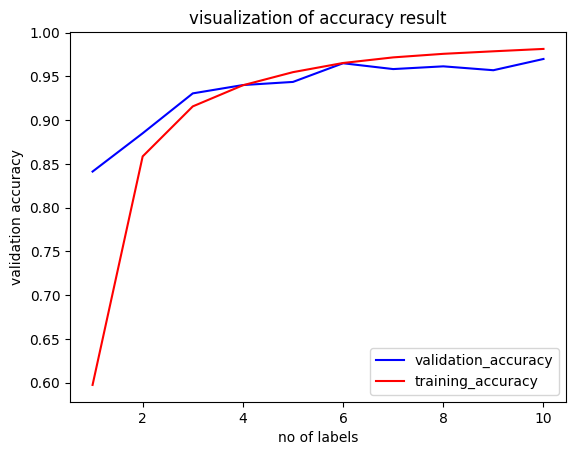

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label='validation_accuracy')
plt.plot(epochs,training_history.history['accuracy'], color='red', label='training_accuracy')
plt.xlabel('no of labels')
plt.ylabel('validation accuracy')
plt.title('visualization of accuracy result')
plt.legend()
plt.show()

In [ ]:
## some other metrics of our model
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 17572 files belonging to 38 classes.


In [ ]:
y_pred=model.predict(test_set)

NameError: name 'model' is not defined

In [ ]:
y_pred,y_pred.shape

(array([[9.9999964e-01, 1.3938904e-13, 2.5344694e-12, ..., 4.5154354e-18,
         5.3952053e-18, 7.0898691e-16],
        [9.9999881e-01, 1.2879653e-08, 1.0778486e-08, ..., 3.2328326e-13,
         6.6606090e-14, 3.2690023e-12],
        [1.0000000e+00, 4.8323438e-17, 3.4705356e-14, ..., 7.7913091e-23,
         1.2771934e-19, 2.1187603e-16],
        ...,
        [1.5966096e-09, 6.9132731e-13, 5.7238297e-10, ..., 1.4979266e-12,
         2.5580137e-11, 9.9996281e-01],
        [1.6650795e-08, 4.9598166e-11, 1.1401951e-08, ..., 3.3875437e-11,
         3.7088568e-10, 9.9999118e-01],
        [1.5605970e-15, 9.8119926e-19, 4.3579430e-15, ..., 4.5917568e-20,
         6.2865038e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
# for each image it is giving probability of belonging to that class
predicted_categories=tf.argmax(y_pred,axis=1)


In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories=tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
Y_true.shape

TensorShape([17572])

In [ ]:
#calculate precision recall


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.96       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.99      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.96      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model("/content/drive/My Drive/model_saves/trained_model.h5")


In [ ]:
import json
import os

# Define the path to the saved history file
save_path = '/content/drive/My Drive/model_saves/'
history_path = os.path.join(save_path, "training_hist.json")

# Load the training history
try:
    with open(history_path, "r") as f:
        training_history = json.load(f)
    print("Training history loaded successfully.")
except Exception as e:
    print(f"Error loading training history: {e}")


Training history loaded successfully.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
predictions = model.predict(test_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step


In [ ]:
predictions

array([[9.9999964e-01, 1.3938717e-13, 2.5344549e-12, ..., 4.5154181e-18,
        5.3951639e-18, 7.0898421e-16],
       [9.9999881e-01, 1.2879358e-08, 1.0778361e-08, ..., 3.2327897e-13,
        6.6605196e-14, 3.2689461e-12],
       [1.0000000e+00, 4.8324361e-17, 3.4706152e-14, ..., 7.7915463e-23,
        1.2772275e-19, 2.1188168e-16],
       ...,
       [1.5966064e-09, 6.9132596e-13, 5.7238081e-10, ..., 1.4979237e-12,
        2.5580137e-11, 9.9996281e-01],
       [1.6650795e-08, 4.9598166e-11, 1.1401951e-08, ..., 3.3875437e-11,
        3.7088568e-10, 9.9999118e-01],
       [1.5605909e-15, 9.8119926e-19, 4.3579430e-15, ..., 4.5917568e-20,
        6.2865038e-16, 1.0000000e+00]], dtype=float32)

In [ ]:
predicted_categories=tf.argmax(predictions,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
import numpy as np

# Convert predictions to class labels
predictions = np.argmax(predictions, axis=1)


In [ ]:
from sklearn.metrics import accuracy_score

a = accuracy_score(predictions, Y_true)
print("Accuracy:", a)



Accuracy: 0.9699521966765309


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm=confusion_matrix(Y_true,predictions)

In [ ]:
cm

array([[482,   0,   0, ...,   0,   0,   0],
       [  1, 487,   2, ...,   0,   0,   0],
       [  0,   0, 423, ...,   1,   1,   1],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 479]])

Text(470.72222222222223, 0.5, 'actual label')

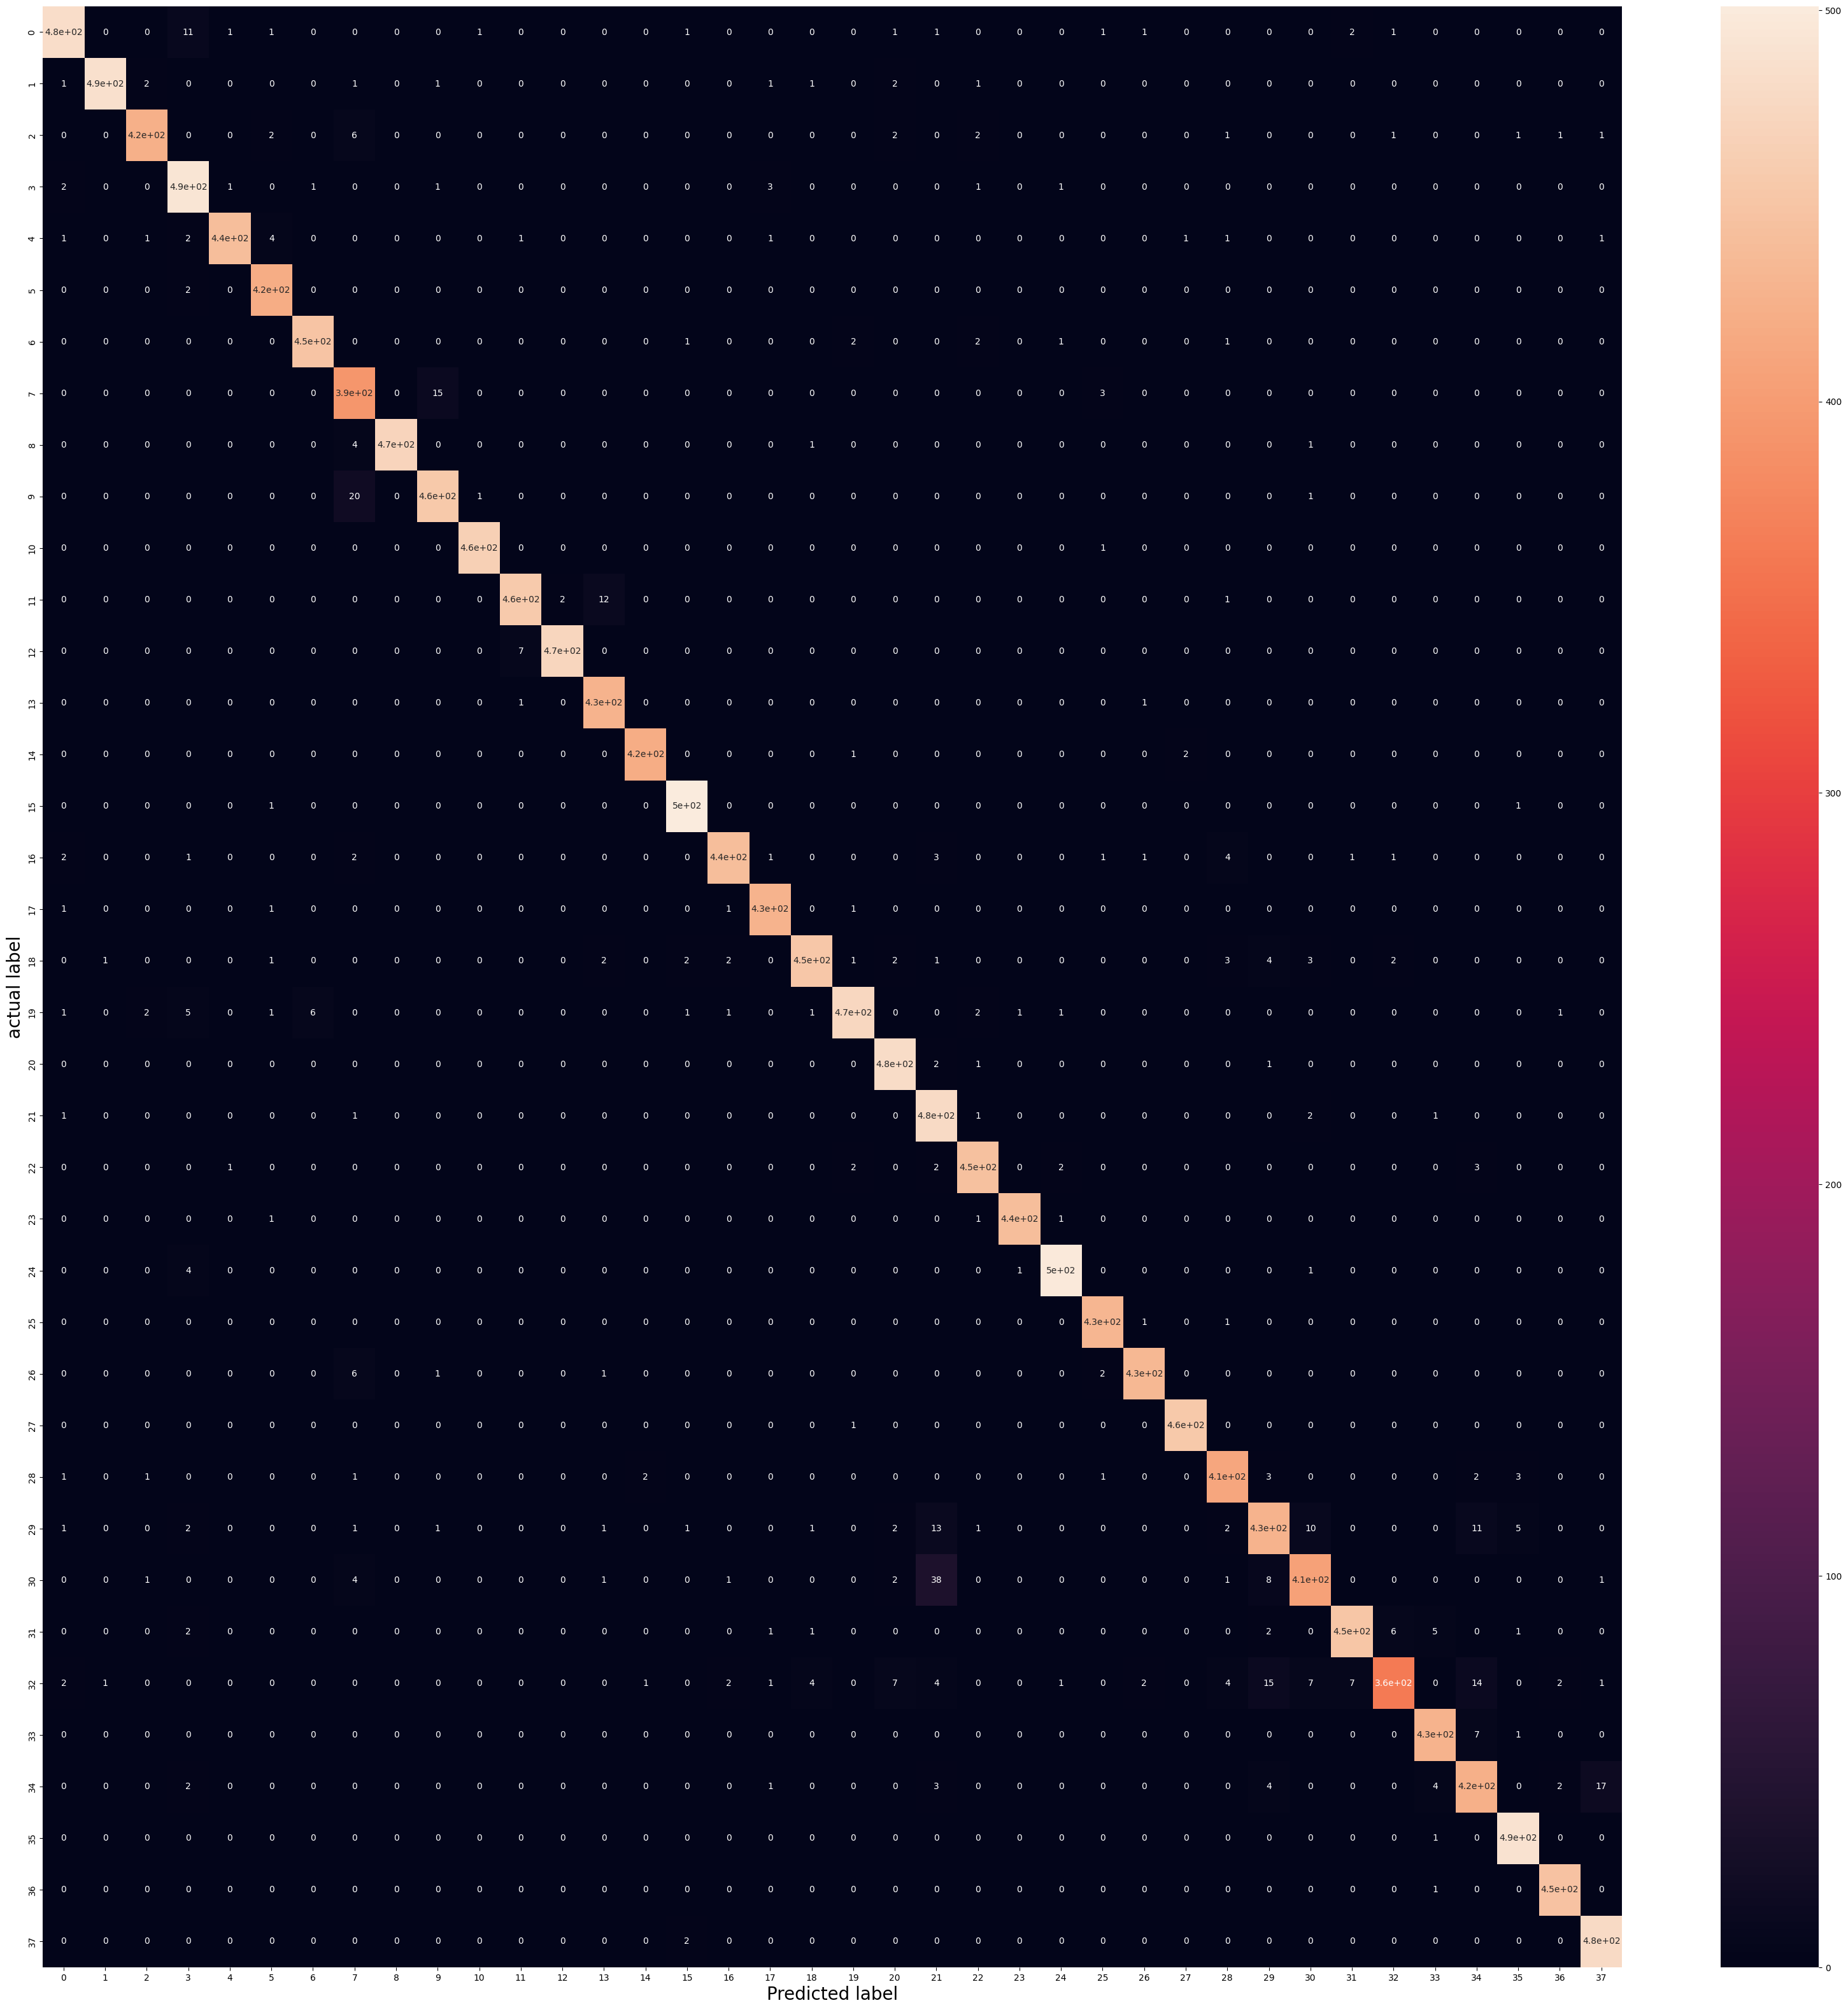

In [ ]:
## confusion matrix visualisation
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("actual label", fontsize=20)

In [ ]:
#performing  model prediction on test data

